<a href="https://colab.research.google.com/github/ddevMetal/CSIT128/blob/main/UOW_Lab_4_CNN_exercise_1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks (CNN) with Exercises

In this notebook, you will learn the basic theory behind Convolutional Neural Networks (CNNs), build a CNN model to classify the MNIST dataset, and work through exercises that will help you understand the concepts better.

**Notebook Outline:**
1. **Theory of CNN:** Learn about convolution, activation, pooling, and fully connected layers.
2. **Building a Modified CNN:** Code a CNN model using TensorFlow/Keras that includes an extra convolutional layer.
3. **Exercises:** Modify the architecture further and visualize feature maps to reinforce your understanding.

Author: Cher Lim


In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt


## 1. Theory of CNN

Convolutional Neural Networks (CNNs) are widely used for image classification tasks. Here are the key components:

- **Convolutional Layers:**  
  Apply filters (kernels) that slide over the input image to produce feature maps. This operation helps detect features such as edges and textures.
  
- **Activation Functions (e.g., ReLU):**  
  Introduce non-linearity into the model so that it can learn complex patterns.

- **Pooling Layers (e.g., MaxPooling):**  
  Reduce the spatial dimensions of the feature maps, which lowers computational load and helps the model become invariant to small translations in the image.

- **Flattening:**  
  Converts the 2D feature maps into a 1D vector to prepare for classification.

- **Fully Connected (Dense) Layers:**  
  Process the flattened features to make the final classification decision.

In [2]:
# Load the MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


## 2. Building a Modified CNN Model

Below is the CNN model which now includes an extra convolutional block. The updated architecture is as follows:

- **First Convolutional Block:**
  - **Conv2D Layer:** 32 filters of size 3×3 with ReLU activation.
  - **MaxPooling2D Layer:** 2×2 pooling to down-sample the feature maps (from 28×28 to 14×14).

- **Second Convolutional Block (New Extra Layer):**
  - **Conv2D Layer:** 64 filters of size 3×3 with ReLU activation.
  - **MaxPooling2D Layer:** 2×2 pooling to further reduce the spatial dimensions (from 14×14 to 7×7).

- **Flattening and Dense Layers:**
  - **Flatten Layer:** Converts the final feature maps into a 1D vector.
  - **Dense Layer:** A fully connected layer with 128 neurons and ReLU activation.
  - **Output Dense Layer:** A softmax layer with 10 neurons for classification.

Run the following cell to define and compile the updated model.

In [4]:
# Define the model using the functional API
input_layer = Input(shape=(28, 28, 1))

# First convolutional block
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second convolutional block
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten and fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.1, epochs=5, batch_size=128)



Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.8447 - loss: 0.5322 - val_accuracy: 0.9812 - val_loss: 0.0647
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accuracy: 0.9787 - loss: 0.0693 - val_accuracy: 0.9845 - val_loss: 0.0557
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.9864 - loss: 0.0445 - val_accuracy: 0.9840 - val_loss: 0.0563
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 115ms/step - accuracy: 0.9887 - loss: 0.0351 - val_accuracy: 0.9892 - val_loss: 0.0413
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 122ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9898 - val_loss: 0.0435


#Questions:
How do you interpret the above data log?
1. Epoch e.g. Epoch 1/5 ...
2. Step e.g. 422/422 ...


In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9867 - loss: 0.0369
Test accuracy: 0.989300012588501


#Question:
What is the batch size set for evaluating the model?

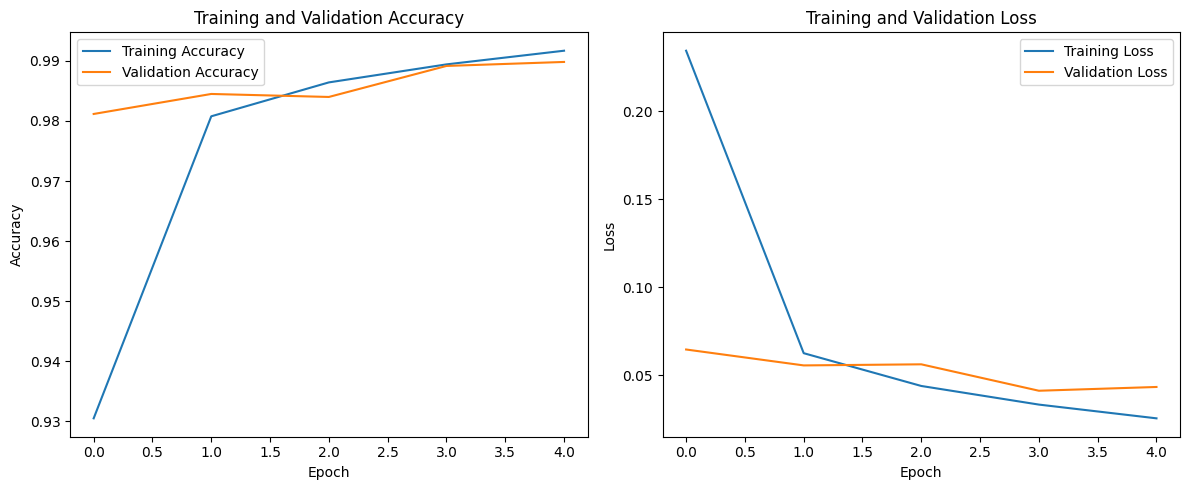

In [7]:
# Plot training and validation accuracy and loss
def plot_training_history(history):
    # Get training and validation metrics
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the curves
plot_training_history(history)


## 3. Exercises

Now that you have built and trained an updated CNN with an extra convolutional layer, try the following exercises to deepen your understanding.

---

### **Exercise 1: Modify the CNN Architecture**

**Task:**  
Change the number of filters in the first `Conv2D` layer from 32 to 64.

**Instructions:**  
1. Update the model architecture in the cell where the CNN is defined.
2. Retrain the model.
3. Compare the test accuracy and training behavior with the original model.

**Your Observations:**  
_Write your observations in a Markdown cell after testing your modifications._

---


In [23]:
#Exercise 1: Modify the CNN architecture


### **Exercise 2: Add a Dropout Layer**

**Task:**  
Add a dropout layer after the `Flatten()` layer to help prevent overfitting.

**Instructions:**  
1. Insert `Dropout(0.5)` after the `Flatten()` layer in the model.
2. Retrain the model.
3. Compare the performance (accuracy and training/validation loss) with the model without dropout.

**Your Observations:**  
_Write your observations in a Markdown cell after testing your modifications.
_

---

In [9]:
from tensorflow.keras.layers import Dropout

In [10]:
#Exercise 2: Add a Dropout Layer: What does Dropout(0.5) mean?

### **Exercise 3: Visualize Feature Maps**

**Task:**  
Visualize the feature maps (activations) from the first convolutional layer for a test image.

1. Run the following code.
2. Describe your observations of the feature maps.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


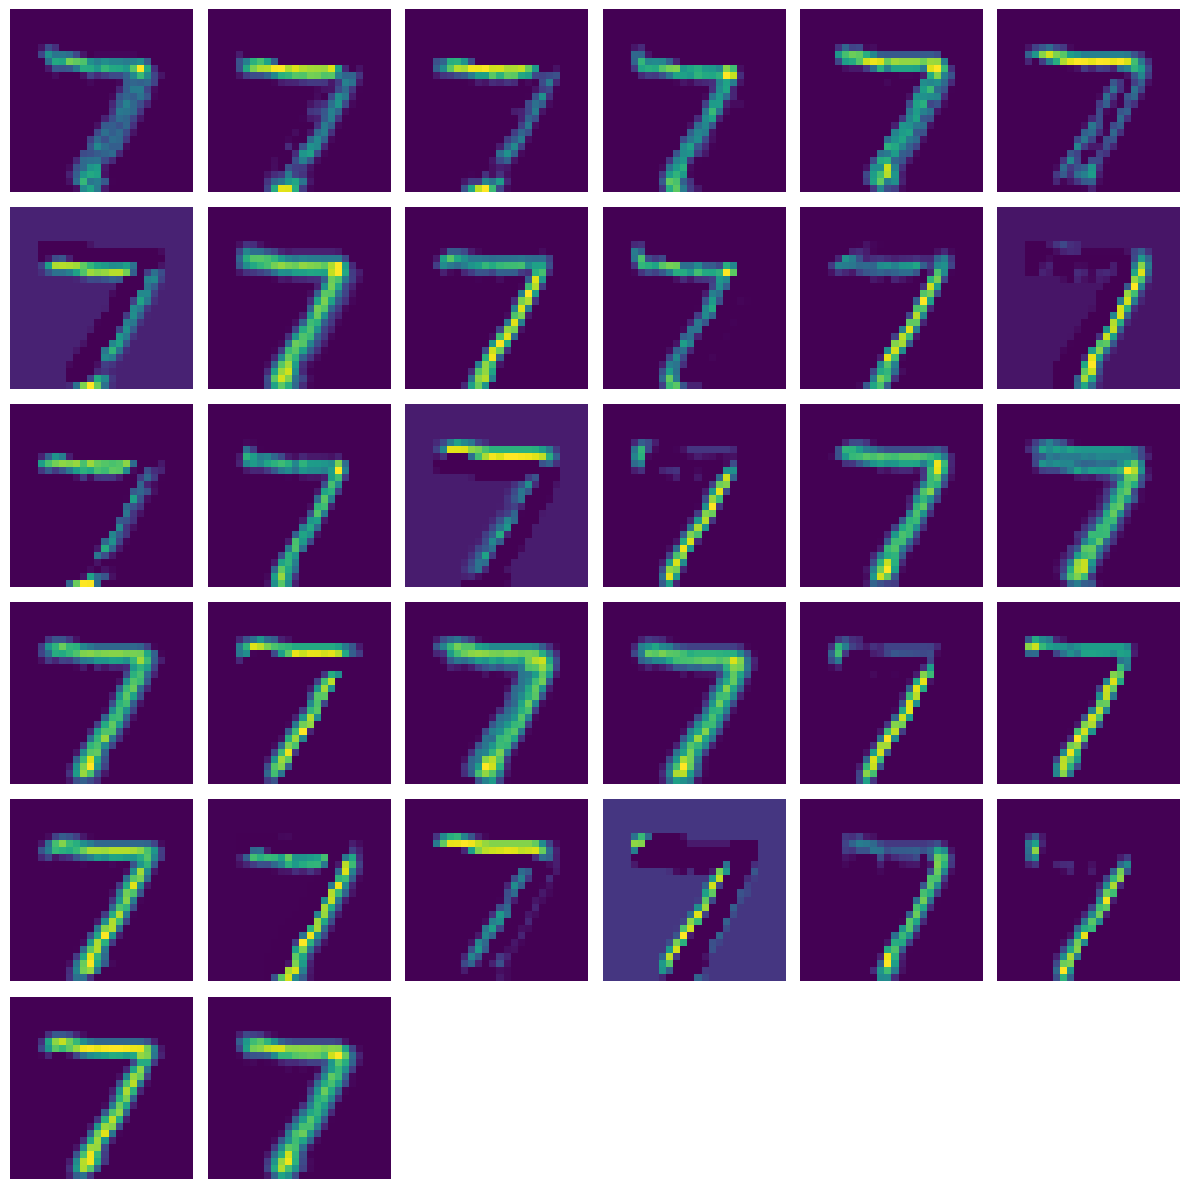

In [11]:
# Select a test image from the test set
test_image = x_test[0]
test_image_expanded = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Extract the first Conv2D layer
conv_layers = [layer for layer in model.layers if isinstance(layer, Conv2D)]
if conv_layers:
    # Create a new model that outputs the activation of the first Conv2D layer
    activation_model = Model(inputs=model.input, outputs=conv_layers[0].output)
    activation = activation_model.predict(test_image_expanded)

    # Plot the feature maps
    num_filters = activation.shape[-1]
    size = activation.shape[1]

    # Determine grid size for plotting
    grid_size = int(np.ceil(np.sqrt(num_filters)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))

    for i in range(num_filters):
        row = i // grid_size
        col = i % grid_size
        ax = axes[row, col]
        ax.imshow(activation[0, :, :, i], cmap='viridis')
        ax.axis('off')

    # Hide any empty subplots
    for i in range(num_filters, grid_size * grid_size):
        row = i // grid_size
        col = i % grid_size
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No Conv2D layers found in the model.")
